1. Loading and Understanding the Dataset

Importing the necessary python libararies

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

Reading the dataset

In [4]:
data = pd.read_csv('/content/GOLD_2022_normalised_NEW-1000.csv')

Displaying the first few rows of the dataset

In [5]:
data.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
0,1.828604,1.829628,1.828544,1.829504,0.009718,1.829656,1.830936,1.829386,1.830196,0.009050,0.629054,0.000709,0.751830,0.691381,0.801417,0.836836,1.0,1.0,1.829628,1.829386
1,1.829504,1.830104,1.829398,1.830004,0.007151,1.829936,1.830676,1.829916,1.830632,0.009946,0.631369,0.002969,0.898229,0.865171,0.877922,0.851948,0.0,0.0,1.830104,1.829916
2,1.830098,1.830604,1.829998,1.830534,0.011126,1.830612,1.831226,1.830516,1.831146,0.016555,0.633130,0.005766,0.878867,0.853365,0.877922,0.855726,0.0,0.0,1.830604,1.830516
3,1.830534,1.830704,1.830504,1.830674,0.001991,1.831156,1.831306,1.831046,1.831046,0.006808,0.632720,0.005116,0.853365,0.858087,0.872255,0.912397,0.0,0.0,1.830704,1.831046
4,1.830674,1.830674,1.830448,1.830508,0.006660,1.831026,1.831181,1.830886,1.831086,0.010739,0.632227,0.004332,0.917119,0.880520,0.896812,0.863754,0.0,0.0,1.830674,1.830886


Checking for basic info like column names, data types, and missing values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108180 entries, 0 to 108179
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Open_Bid          108180 non-null  float64
 1   High_Bid          108180 non-null  float64
 2   Low_Bid           108180 non-null  float64
 3   Close_Bid         108180 non-null  float64
 4   Volume_Bid        108180 non-null  float64
 5   Open_Ask          108180 non-null  float64
 6   High_Ask          108180 non-null  float64
 7   Low_Ask           108180 non-null  float64
 8   Close_Ask         108180 non-null  float64
 9   Volume_Ask        108180 non-null  float64
 10  Volume_Delta      108180 non-null  float64
 11  Volume_Delta_abs  108179 non-null  float64
 12  Open_Delta        108179 non-null  float64
 13  High_Delta        108179 non-null  float64
 14  Low_Delta         108179 non-null  float64
 15  Close_Delta       108179 non-null  float64
 16  New_day           10

Descriptive statistics

In [7]:
data.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,New_day,New_week,Y_High_Bid,Y_Low_Ask
count,108180.000000,108180.000000,108180.000000,108180.000000,108180.000000,108180.000000,108180.000000,108180.000000,108180.000000,108180.000000,108180.000000,108179.000000,108179.000000,108179.000000,108179.000000,108179.000000,108179.000000,108179.000000,108179.000000,108179.000000
mean,1.890326,1.890633,1.890018,1.890325,0.014519,1.890693,1.890998,1.890384,1.890695,0.014668,0.629599,0.004432,0.913588,0.913927,0.913727,0.913021,0.000730,0.000148,1.890632,1.890384
std,0.065301,0.065388,0.065211,0.065300,0.011317,0.065323,0.065410,0.065234,0.065324,0.011692,0.005264,0.007091,0.018138,0.016927,0.016638,0.017076,0.027014,0.012161,0.065388,0.065234
min,1.780388,1.781028,1.780158,1.780398,0.000000,1.780722,1.781362,1.780482,1.780735,0.000000,0.192298,0.000000,0.484534,0.535773,0.553011,0.545927,0.000000,0.000000,1.781028,1.780482
25%,1.823664,1.823894,1.823437,1.823658,0.006690,1.823982,1.824226,1.823772,1.823992,0.006712,0.627814,0.001105,0.905077,0.906021,0.906021,0.904841,0.000000,0.000000,1.823894,1.823772
50%,1.908638,1.908974,1.908328,1.908638,0.011558,1.909012,1.909345,1.908692,1.909019,0.011753,0.629540,0.002781,0.915466,0.915702,0.915466,0.914286,0.000000,0.000000,1.908973,1.908692
75%,1.939694,1.940038,1.939318,1.939684,0.019369,1.940069,1.940422,1.939683,1.940072,0.019590,0.631320,0.005805,0.923731,0.923731,0.923731,0.923259,0.000000,0.000000,1.940038,1.939684
max,2.069368,2.070358,2.066518,2.069358,0.696943,2.069812,2.070778,2.067052,2.069802,0.579609,1.000000,0.694523,0.976151,0.976151,0.976151,0.976151,1.000000,1.000000,2.070358,2.067052


2. Exploratory Data Analysis

Checking for Missing Data

In [8]:
missing_values = data.isnull().sum()

Feature Distribution: Visualize the distribution of important features like Open_Bid, Close_Bid, Volume_Bid, etc.

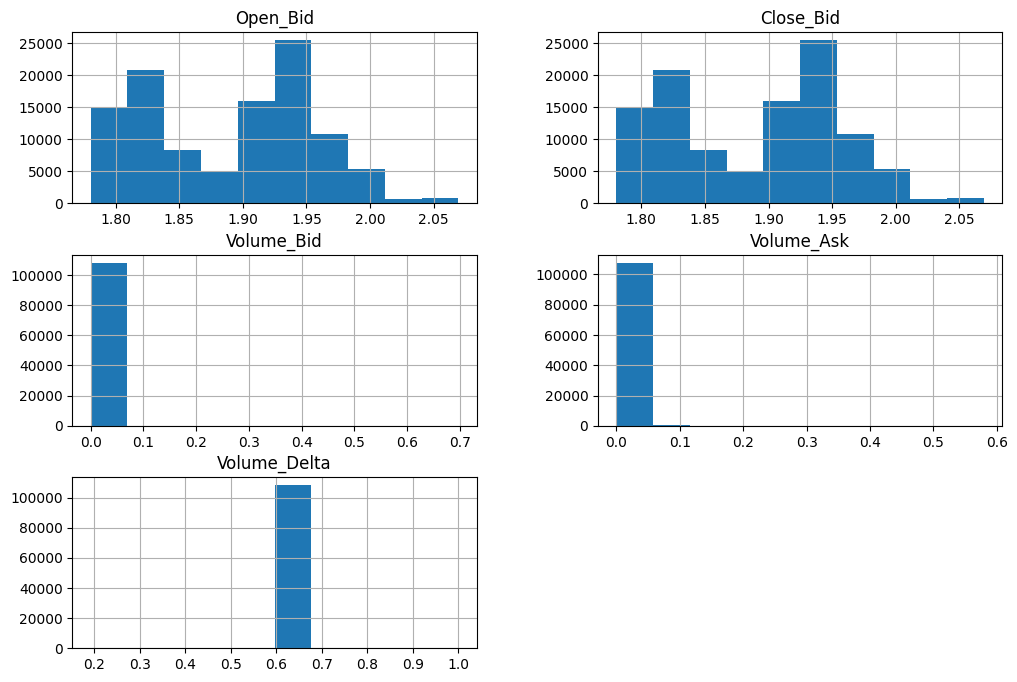

In [9]:
data[['Open_Bid', 'Close_Bid', 'Volume_Bid', 'Volume_Ask', 'Volume_Delta']].hist(figsize=(12, 8))
plt.show()

Correlation Analysis

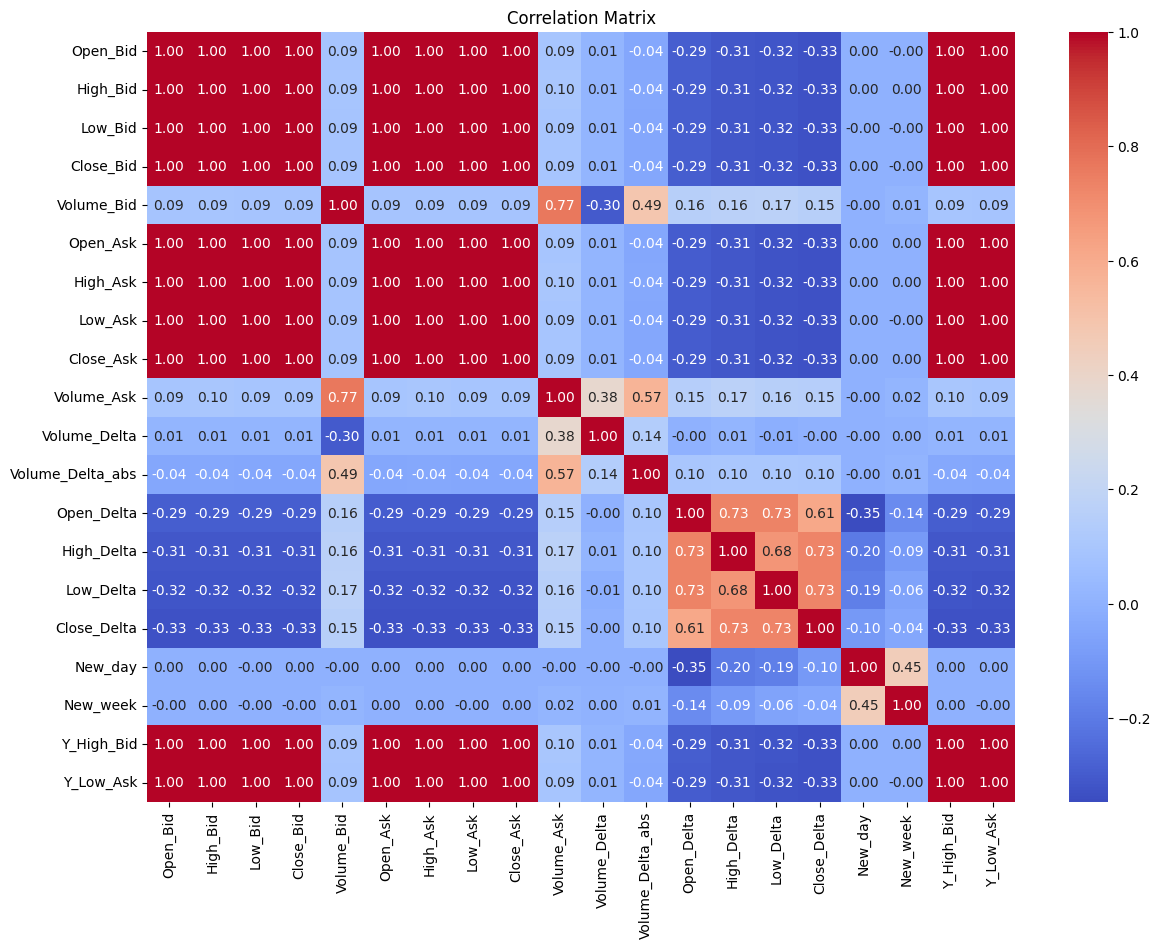

In [10]:
corr = data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Feature Engineering

Creating additional features that may help improve model performance: 5-day moving average

In [11]:
data['SMA_5'] = data['Close_Bid'].rolling(window=5).mean()

Adding percentage change in price

In [12]:
data['Price_Change'] = data['Close_Bid'].pct_change()

Data Preprocessing for Machine Learning

Feature Selection: Selecting relevant features for training

In [13]:
features = ['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 'SMA_5', 'Price_Change']
target = 'Close_Bid'
X = data[features]
y = data[target]

Spliting the data into training and test sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Scaling Features

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Machine Learning Models: Random Forest Regressor

In [16]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest MSE: {mse_rf}")

Random Forest MAE: 2.8461351451590496e-06
Random Forest MSE: 2.417379979670068e-11


Model Evaluation

In [17]:
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R²: {r2_rf}")

Random Forest R²: 0.9999999407112276


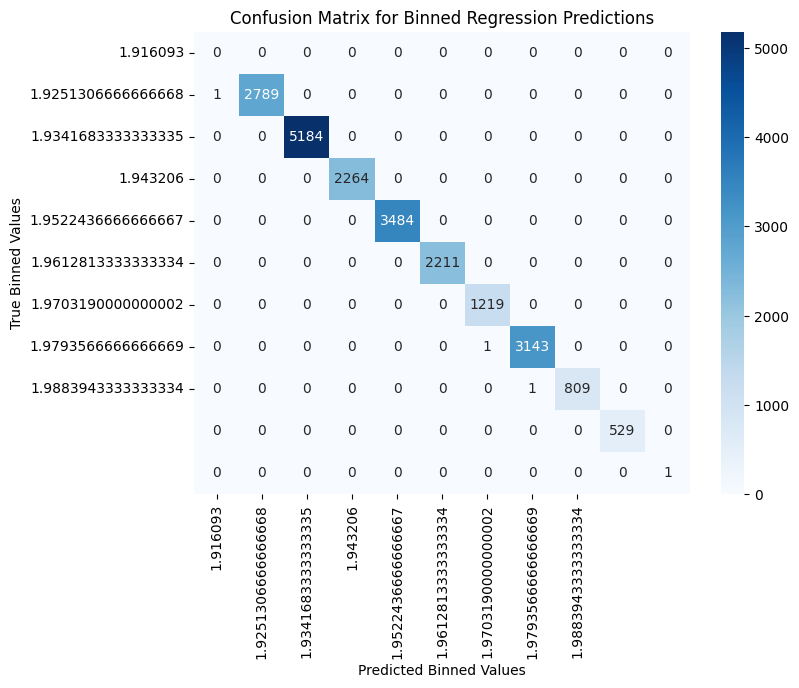

In [21]:
bins = np.linspace(min(y_test), max(y_test), 10)  # 10 bins
y_test_binned = np.digitize(y_test, bins)
y_pred_binned = np.digitize(y_pred_rf, bins)
cm = confusion_matrix(y_test_binned, y_pred_binned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=bins[:-1], yticklabels=bins[:-1])
plt.title('Confusion Matrix for Binned Regression Predictions')
plt.xlabel('Predicted Binned Values')
plt.ylabel('True Binned Values')
plt.show()

Deep Learning Model: ANN

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7094/7094 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0549 - mae: 0.0845 - val_loss: 1.2963e-04 - val_mae: 0.0066
Epoch 2/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 5.6552e-04 - mae: 0.0104 - val_loss: 6.7641e-05 - val_mae: 0.0034
Epoch 3/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.6168e-04 - mae: 0.0044 - val_loss: 2.0967e-05 - val_mae: 0.0018
Epoch 4/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 3.7915e-05 - mae: 0.0024 - val_loss: 1.0945e-05 - val_mae: 0.0015
Epoch 5/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 2.4200e-05 - mae: 0.0018 - val_loss: 1.3484e-05 - val_mae: 0.0020
Epoch 6/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 2.2050e-05 - mae: 0.0016 - val_loss: 1.4498e-06 - val_mae: 8.2940e-04
Epoch 7/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 7.9781e-06 - mae: 0.0014 - val_loss: 3.9962e-06 - val_mae: 6.6619e-04
Epoch 8/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 5.6487e-06 - mae: 9.8730e-04 - val_loss: 

Test Loss: 8.245065146184061e-07
Test Mean Absolute Error: 0.00048528960905969143
Model saved as 'ANN_GOLD_model.h5'.


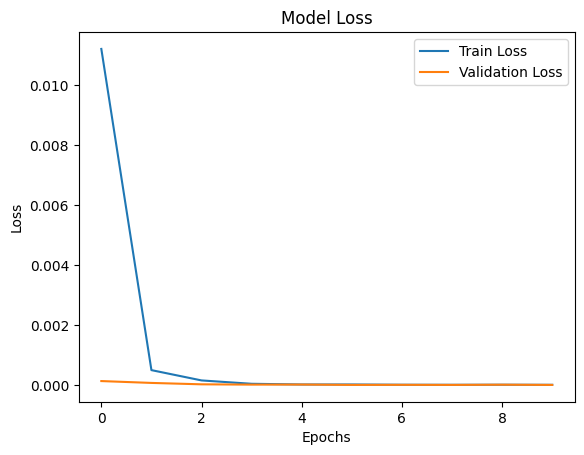

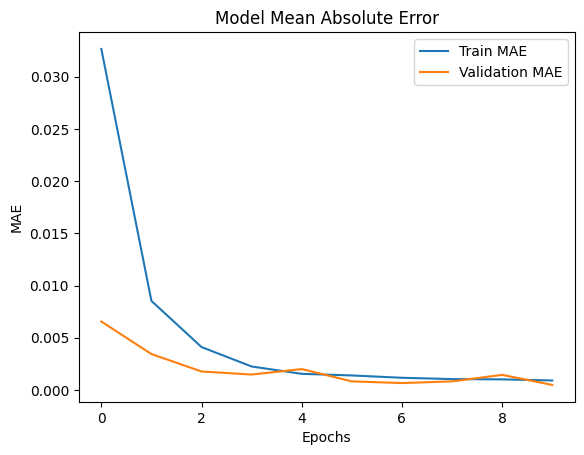

In [23]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

file_path = '/content/GOLD_2022_normalised_NEW-1000.csv'
data = pd.read_csv(file_path)

X = data.drop(columns=['Y_High_Bid', 'Y_Low_Ask'])
y = data[['Y_High_Bid', 'Y_Low_Ask']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

history = model.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

evaluation = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {evaluation[0]}")
print(f"Test Mean Absolute Error: {evaluation[1]}")

model.save('ANN_GOLD_model.h5')
print("Model saved as 'ANN_GOLD_model.h5'.")

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

2217/2217 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Confusion Matrix for Y_High_Bid:


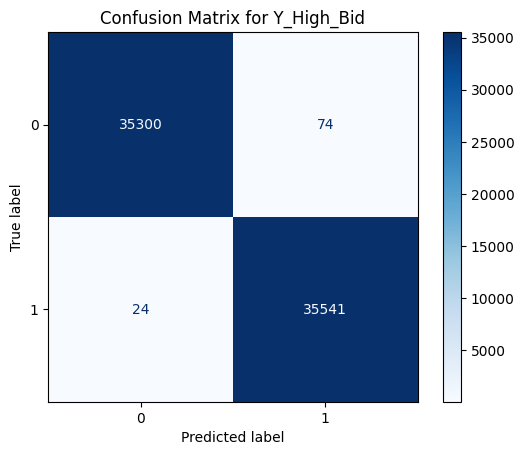

Confusion Matrix for Y_Low_Ask:


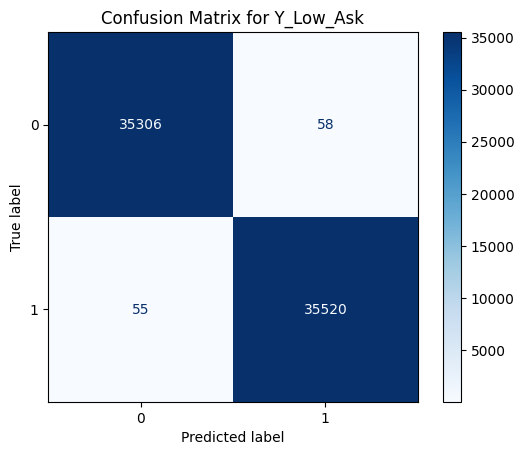

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


y_pred = model.predict(X_test_scaled)

threshold_high_bid = y['Y_High_Bid'].median()
threshold_low_ask = y['Y_Low_Ask'].median()
y_pred_classes = np.array([
    [1 if pred[0] >= threshold_high_bid else 0,
     1 if pred[1] >= threshold_low_ask else 0]
    for pred in y_pred
])

y_test_classes = np.array([
    [1 if actual[0] >= threshold_high_bid else 0,
     1 if actual[1] >= threshold_low_ask else 0]
    for actual in y_test.to_numpy()
])
for i, label in enumerate(['Y_High_Bid', 'Y_Low_Ask']):
    cm = confusion_matrix(y_test_classes[:, i], y_pred_classes[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    print(f"Confusion Matrix for {label}:")
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {label}")
    plt.show()